# Author: Olufemi Victor 

###### The Sparks Foundation
The notebook descibes how to perform the Kmeans clustering on the Iris dataset. This task was done in fufilment of my internship at the sparks foundation.

### Unsupervised Machine Learning : Kmeans Clustering

In [1]:
# import the necessary packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load in the dataset
data = pd.read_csv("Iris.csv")

In [3]:
#View the first 10 rows of the dataset
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


###### Unsupervised learning.
In unsupervised learning, we do not require labels to generate clusters, rather we use only the dependent columns to predict clusters, based on similarity in the data itself.

In [4]:
# drop the label column and the ID as well
data = data.drop(columns=["Id", "Species"])

In [5]:
# See the data now 
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


###### The Kmeans Algorithm
The Kmeans Algorithm is an unsupervised learning algorithm in the sklearn library, we pull this out and use it.

In [6]:
# Import the Kmeans
from sklearn.cluster import KMeans

###### Predicting Number of Clusters Using The Elbow Method.
When using the Kmeans Algorithm, we need to feed in the number of clusters (or labels) we expect from the data. Yes, of course, we do not know this, so we use the Within Cluster Sum of Squares, which calculate the distance between the centroids. 

The point is, with the Error reducing drastically, we are sure that we are getting closer to the supposed number of clusters it should have.

In [7]:
Within_Cluster_Sum_of_Squares = [] # i need an empty list to store my variables.

# peroform the Within Cluster Sum of Squares calculation
for proposed_number_of_clusters in range(1,11): # i know the nature of my data,max expected label is 10
    kmeans = KMeans(n_clusters=proposed_number_of_clusters, random_state= 42) #kmeans inputs
    kmeans.fit(data)
    Within_Cluster_Sum_of_Squares.append(kmeans.inertia_) # the error

###### Plotting the error.
See where the error stops reducing drastically, at point 3. Therefore, its safe to assume that the number of clusters is assumed to be 3.

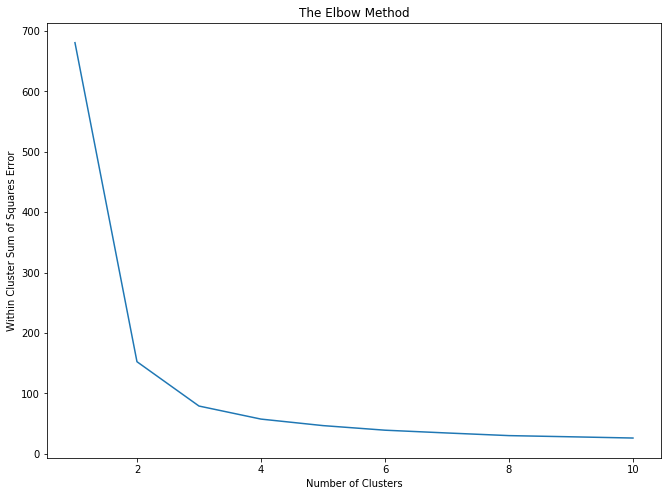

In [8]:
fig, axis = plt.subplots(figsize = (11,8))
sns.lineplot(x=range(1,11), y=Within_Cluster_Sum_of_Squares, ax = axis)
plt.title("The Elbow Method")
plt.ylabel("Within Cluster Sum of Squares Error")
plt.xlabel("Number of Clusters")
plt.show()

since i imported Seaborn, i used the cluster map to confirm my assumptions. Cluster map confirms we are having three distinct data points

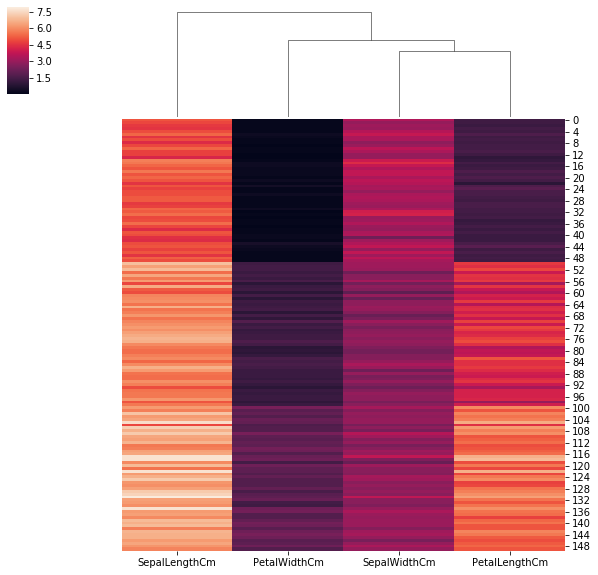

In [9]:
sns.clustermap(data, row_cluster=False)

##### Using the Algorithm.
Now, we know that our algorithm contains three distinct points, we use this number of clusters to generate insights from the data.

In [10]:
# mind the spelling, i'm initializing my KMeans as kmeans
kmeans = KMeans(n_clusters=3)

In [11]:
# use the fit_predict method since we want to plot insights.
kmeans_predictions = kmeans.fit_predict(data)

In [12]:
# convert my pandas column to an array for easier manipulation.
data = data.values

In [13]:
print("These are the labels it is predicting")
(kmeans.labels_)

These are the labels it is predicting


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

###### Finally, plot insights.
 i used only the first two columns to generate this insight.

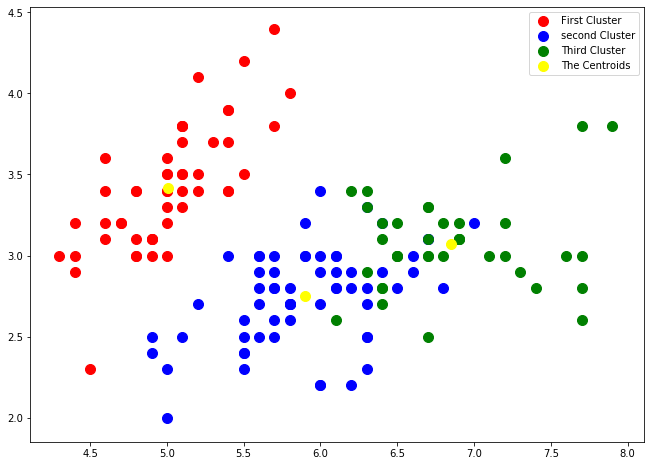

In [14]:
#increase plot size.
fig, axis = plt.subplots(figsize = (11,8))
# plot first cluster
plt.scatter(data[kmeans_predictions == 0, 0],data[kmeans_predictions == 0, 1],c="red", s=100, label = "First Cluster")
# plot second cluster
plt.scatter(data[kmeans_predictions == 1, 0],data[kmeans_predictions == 1, 1],c="blue", s=100, label = "second Cluster")
# plot third cluster
plt.scatter(data[kmeans_predictions == 2, 0],data[kmeans_predictions == 2, 1],c="green", s=100, label = "Third Cluster")
# plot the centroids, which mark the indication of a new cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, label = "The Centroids",c="yellow")
# display label - color
plt.legend()

###### The End. please dont forget to star my repository. http://www.github.com/osinkolu